In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from cosinorage.dataloaders import DataLoader
from cosinorage.features import WearableFeatures

%load_ext autoreload
%autoreload 2

## Raw Accelerometer Data obtained from Smartwatch

In [2]:
reload_smartwatch_p = True

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-20,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 10,
    'filter_type': 'lowpass',
    'filter_cutoff': 2
}

In [4]:
if reload_smartwatch_p:
    smartwatch_loader_p = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=True, preprocess_args=preprocess_args)
    smartwatch_loader_p.load_data(verbose=True)
    with open("smartwatch_loader_p.pkl", "wb") as file:
        pickle.dump(smartwatch_loader_p, file)
else:
    with open("smartwatch_loader_p.pkl", "rb") as file:
        smartwatch_loader_p = pickle.load(file)

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.97it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage


Calibrating:  38%|███▊      | 191/500 [04:06<06:32,  1.27s/iter]

100%|██████████| 479/479 [00:00<00:00, 234567.61it/s]


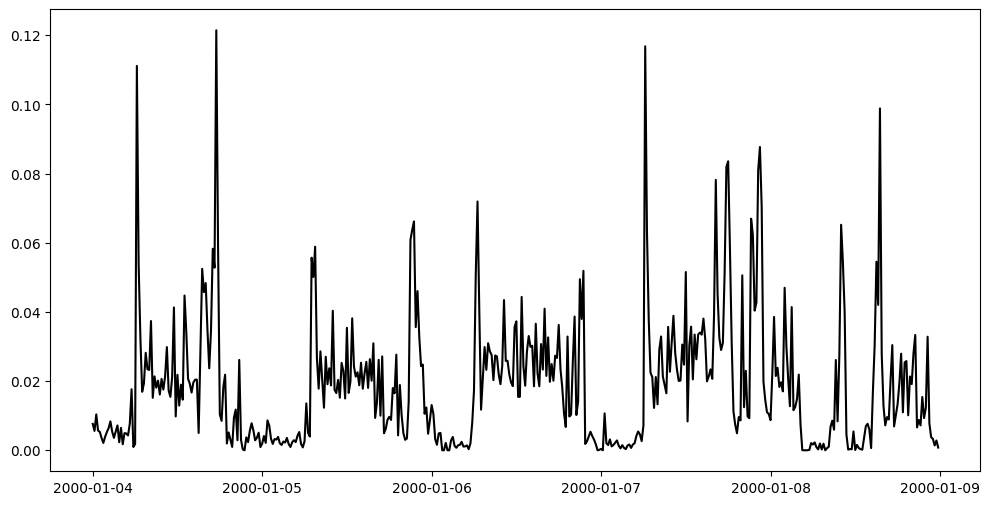

In [5]:
smartwatch_loader_p.plot_orig_enmo()

100%|██████████| 7199/7199 [00:00<00:00, 261268.45it/s]


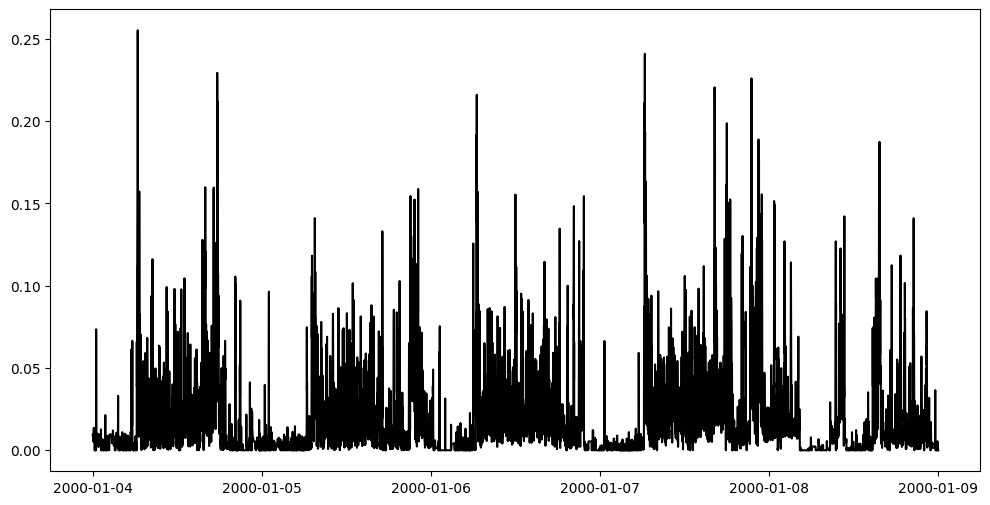

In [6]:
smartwatch_loader_p.plot_enmo()

In [7]:
smartwatch_loader_p.get_meta_data()

{'initial calibration error': 0.020314936980070655,
 'final calibration error': 0.0042347263589134505,
 'offset': array([ 0.0281411 , -0.04058051, -0.01332401]),
 'scale': array([0.99685151, 0.99893266, 0.9989977 ]),
 'total time': 431999.9875,
 'wear time': 426600.0,
 'non-wear time': 5399.987499999988}

In [8]:
data = smartwatch_loader_p.get_acc_data()
data.head()

,X,Y,Z,X_raw,Y_raw,Z_raw,wear,ENMO
TIMESTAMP,,,,,,,,
2000-01-04 00:00:00.000000,-0.705518,0.009451,0.715805,-0.736,0.050,0.730,1.0,0.005098
2000-01-04 00:00:00.012500,-0.705859,0.010923,0.716845,-0.736,0.056,0.730,1.0,0.006093
2000-01-04 00:00:00.025000,-0.706134,0.012323,0.717816,-0.739,0.050,0.730,1.0,0.006994
2000-01-04 00:00:00.037500,-0.706289,0.013604,0.718625,-0.739,0.056,0.736,1.0,0.007696
2000-01-04 00:00:00.050000,-0.706312,0.014727,0.719186,-0.739,0.056,0.739,1.0,0.008128


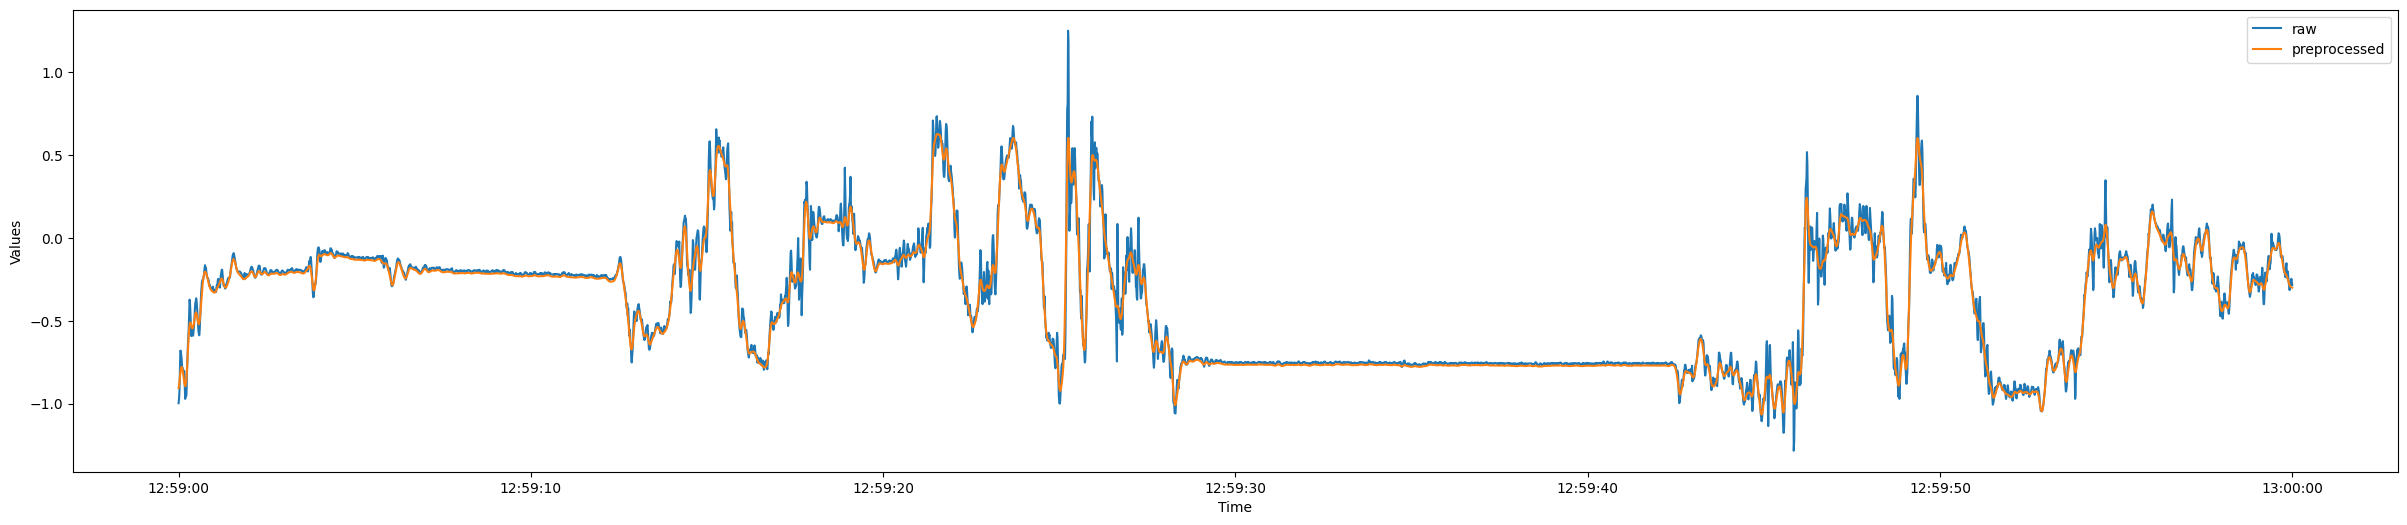

In [22]:
import pandas as pd

# Ensure the index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Select the data for the specified date from 12:00 to 13:00
time_start = pd.Timestamp('2000-01-04 12:59:00')
time_end = pd.Timestamp('2000-01-04 13:00:00')
selected_data = data[(data.index >= time_start) & (data.index <= time_end)]

# Plot raw and preprocessed data
plt.figure(figsize=(30, 6))
plt.plot(selected_data['Z_raw'], label='raw')
plt.plot(selected_data['Z'], label='preprocessed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()



In [10]:
reload_smartwatch = True

In [11]:
if reload_smartwatch:
    smartwatch_loader = DataLoader(datasource='smartwatch', input_path='../data/62164/', preprocess=False)
    smartwatch_loader.load_data(verbose=True)
    with open("smartwatch_loader.pkl", "wb") as file:
        pickle.dump(smartwatch_loader, file)
else:
    with open("smartwatch_loader.pkl", "rb") as file:
        smartwatch_loader = pickle.load(file)

Loading CSV files:   0%|          | 0/145 [00:00<?, ?it/s]

Loading CSV files: 100%|██████████| 145/145 [00:13<00:00, 10.65it/s]


Loaded 41760000 accelerometer data records from ../data/62164/
The frequency of the accelerometer data is 80.0Hz
Filtered out 7200000 accelerometer records due to incomplete daily coverage
Calculated ENMO for 34560000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
load_data executed in 36.51 seconds


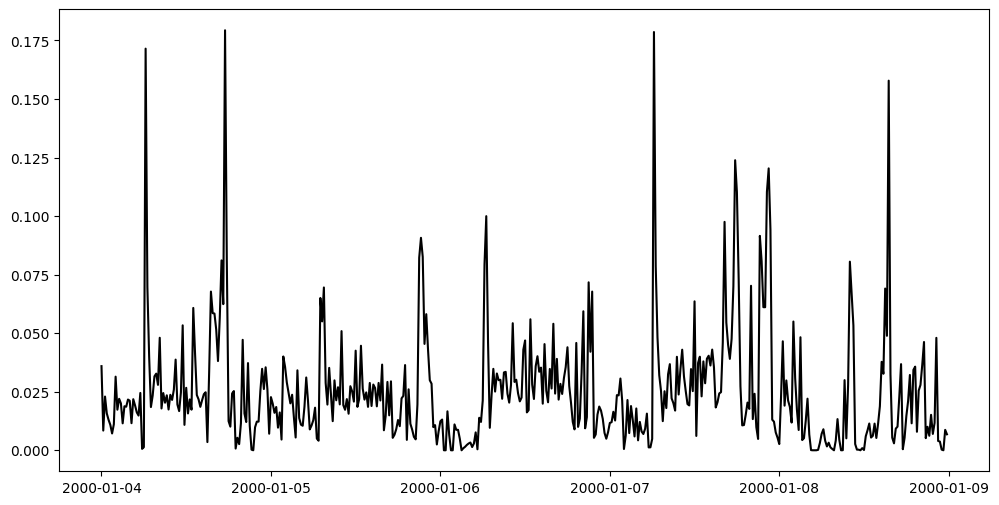

In [12]:
smartwatch_loader.plot_orig_enmo(wear=False)

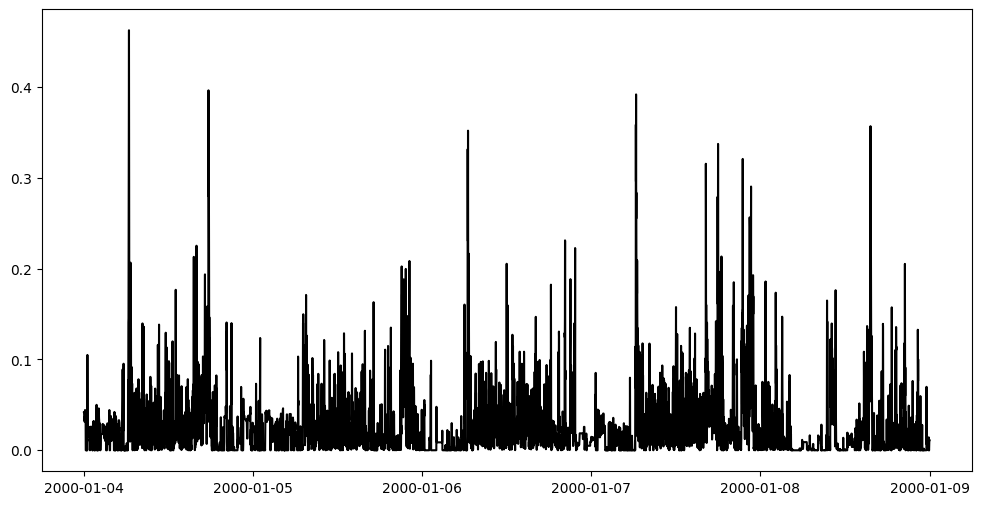

In [13]:
smartwatch_loader.plot_enmo()


In [14]:
smartwatch_loader.get_meta_data()

{}

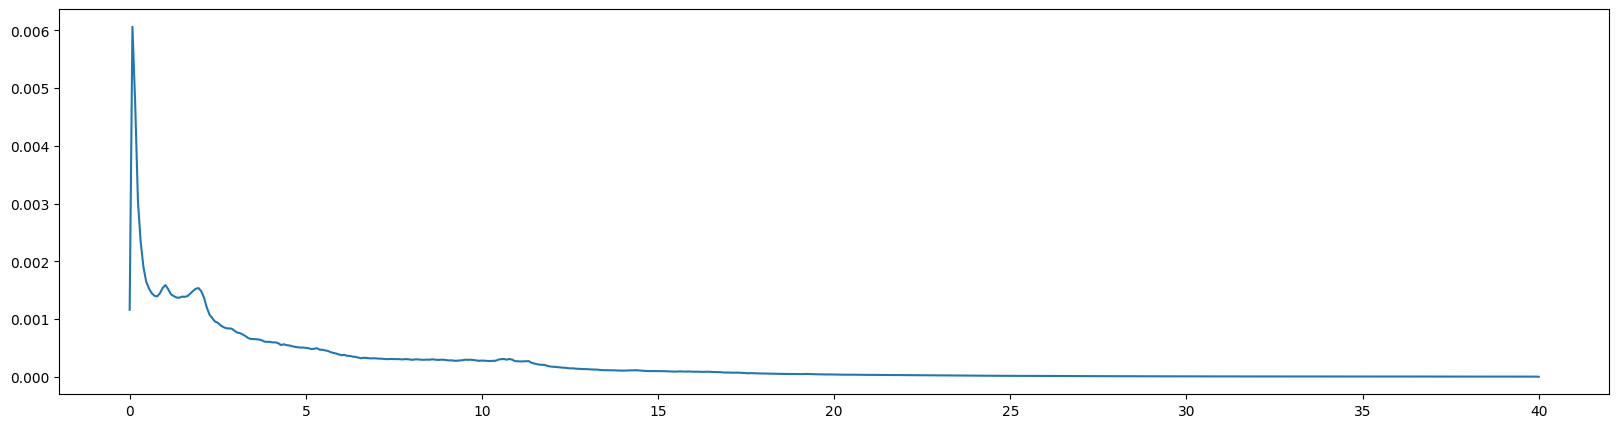

In [15]:
smartwatch_loader.plot_orig_enmo_freq()

## Compute features

In [16]:
preprocessed_features = True
if preprocessed_features:
    features = WearableFeatures(smartwatch_loader_p)
else:
    features = WearableFeatures(smartwatch_loader)

In [17]:
features.get_IV()
features.get_IS()
features.get_RA()
features.get_M10()
features.get_L5()
features.get_M10_start()
features.get_L5_start()
features.get_SB()
features.get_LIPA()
features.get_MVPA()
features.get_WASO()
features.get_TST()
features.get_PTA()
features.get_SRI()
features.get_cosinor_features();


In [18]:
features.get_all()

,IV,IS,RA,M10,M10_start,L5,L5_start,SB,LIPA,MVPA,WASO,TST,PTA,SRI,MESOR,amplitude,acrophase,acrophase_time
2000-01-04,0.520088,0.259165,0.823778,0.032975,17,0.003186,21,2.966667,11.000000,10.033333,0.0,0,0.000000,NaN,0.018341,0.012971,5.928055,1358.610112
2000-01-05,0.733598,0.382479,0.825578,0.029780,21,0.002845,4,1.933333,11.533333,10.533333,0.0,0,0.000000,100.000000,0.017192,0.006984,5.671754,1299.870233
2000-01-06,0.670333,0.344121,0.893753,0.029773,6,0.001670,2,4.283333,7.083333,12.633333,1272.0,92,0.063889,87.222222,0.018685,0.012518,5.894651,1350.954437
2000-01-07,0.632275,0.232728,0.918684,0.043931,22,0.001862,3,2.450000,7.700000,13.850000,0.0,0,0.000000,87.222222,0.025437,0.013520,5.203770,1192.616325
2000-01-08,0.515572,0.394525,0.925983,0.026433,15,0.001016,5,4.383333,10.750000,8.866667,1077.0,97,0.067361,86.527778,0.014668,0.005558,4.498724,1031.031644


In [19]:
features.get_enmo_data()

,ENMO,wear,sleep_predictions,date
TIMESTAMP,,,,
2000-01-04 00:00:00,0.009454,1.0,1,2000-01-04
2000-01-04 00:01:00,0.009636,1.0,1,2000-01-04
2000-01-04 00:02:00,0.008031,1.0,1,2000-01-04
2000-01-04 00:03:00,0.005317,1.0,1,2000-01-04
2000-01-04 00:04:00,0.005317,1.0,1,2000-01-04
...,...,...,...,...
2000-01-08 23:55:00,0.001850,1.0,1,2000-01-08
2000-01-08 23:56:00,0.000000,1.0,1,2000-01-08
2000-01-08 23:57:00,0.002002,1.0,1,2000-01-08


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/features.py:142: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(1, 1)


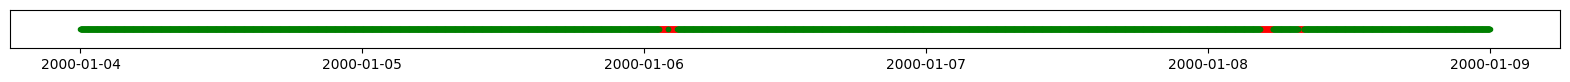

In [20]:
features.plot_sleep_predictions()

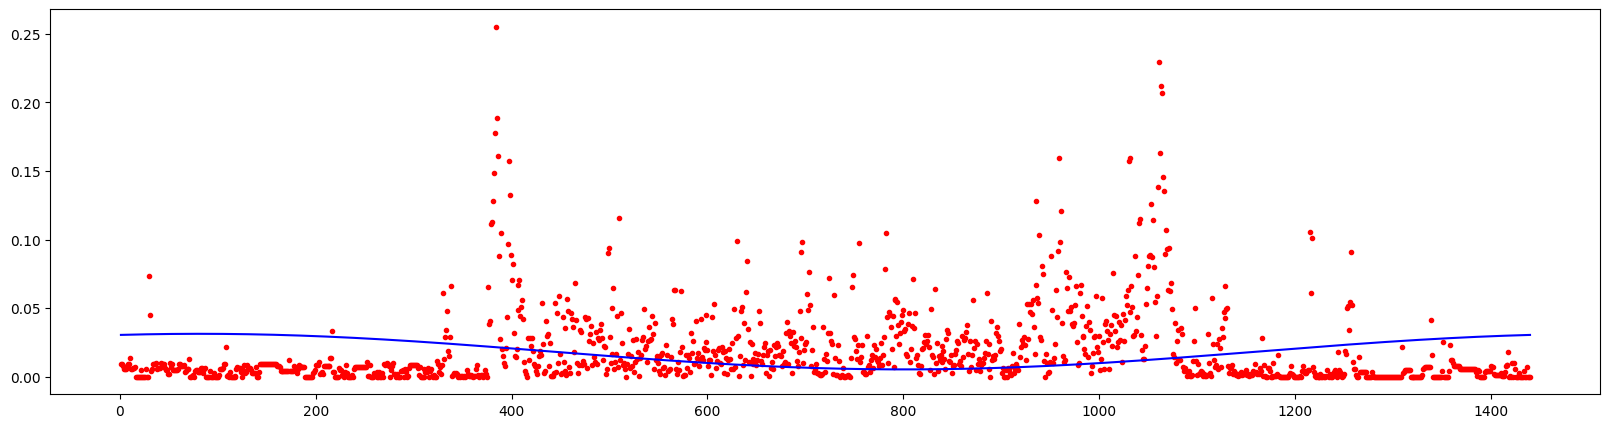

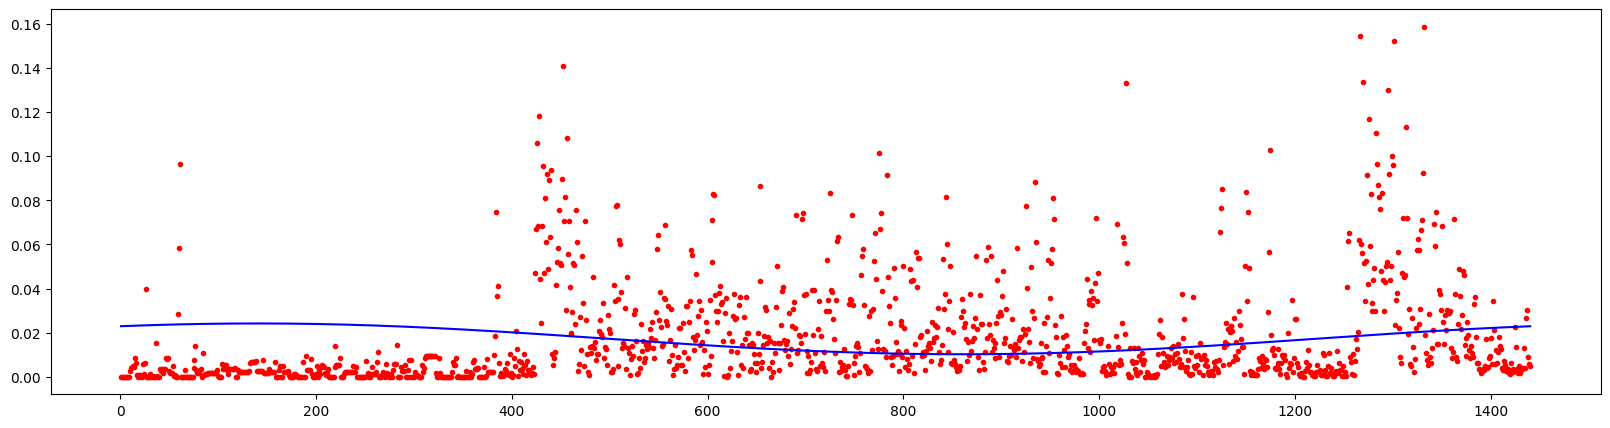

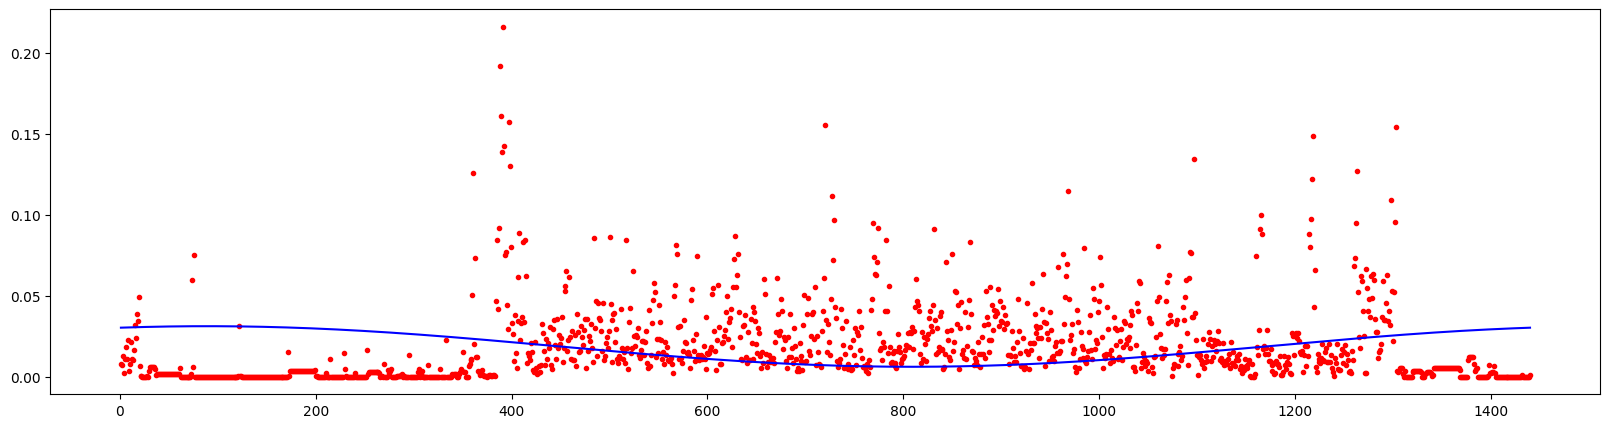

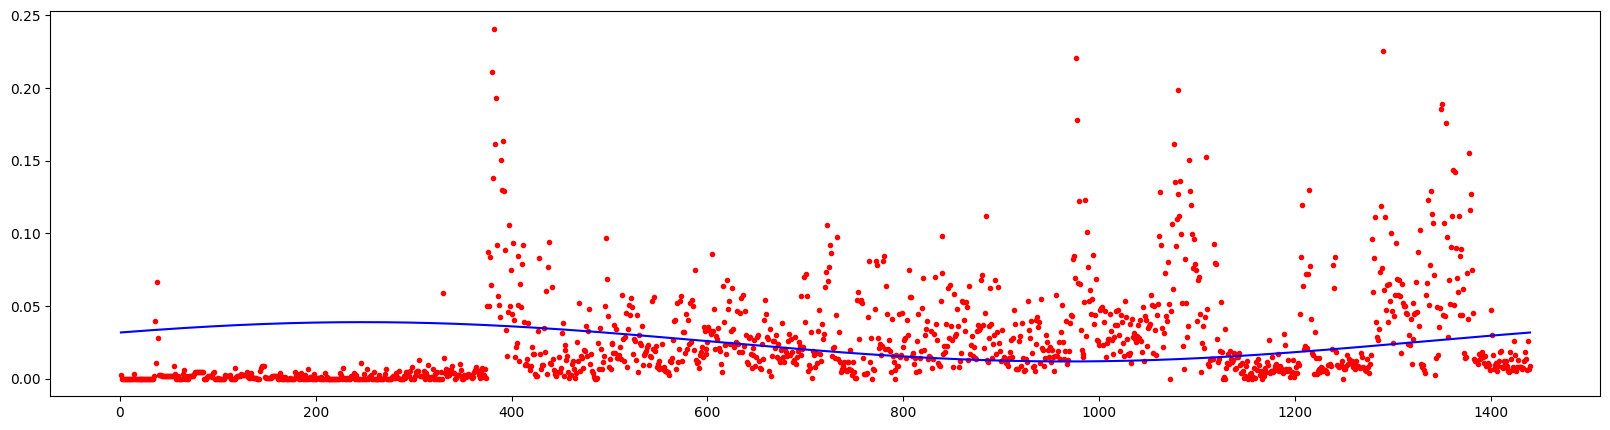

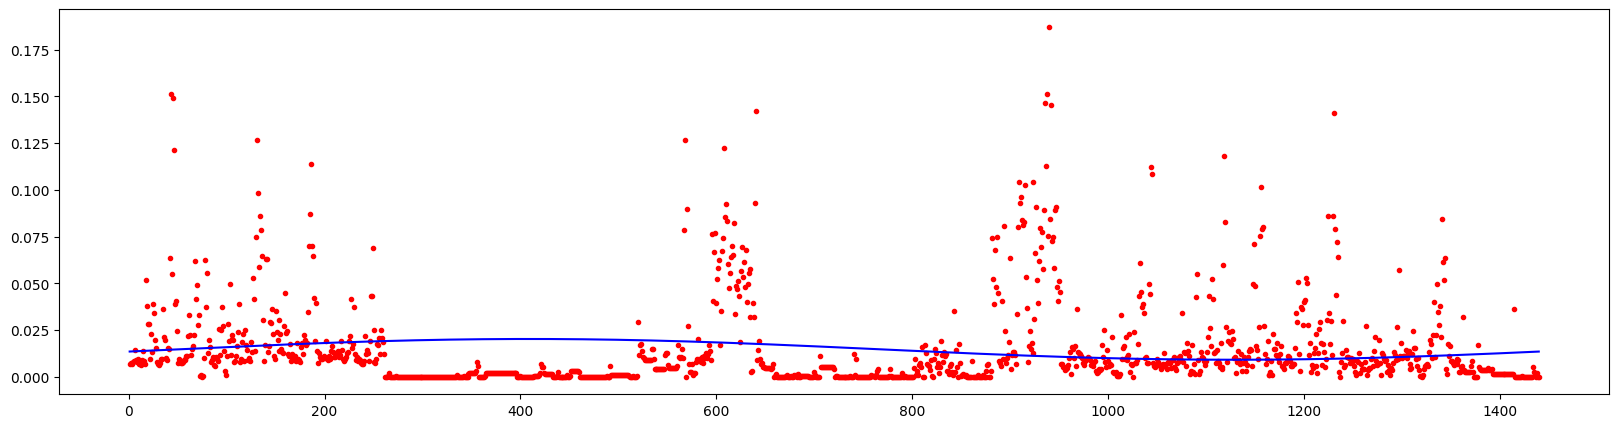

In [21]:
features.plot_cosinor()